# 데이터세트 결합: Concat과 Append p.164

In [17]:
import pandas as pd
import numpy as np
import numexpr

In [2]:
def make_df(cols, ind):
    """DataFrame 생성"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

In [6]:
make_df('ABCD', list(range(4)))

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [10]:
x=[1,2,3]
y=[2,3,4]
z=[3,4,5]
np.concatenate([x,y,z])

array([1, 2, 3, 2, 3, 4, 3, 4, 5])

In [11]:
x=[[1,2,3]]
np.concatenate([x,x], axis=1)

array([[1, 2, 3, 1, 2, 3]])

In [15]:
df1 = make_df('AB',[1,2])
df2 = make_df('AB',[3,4])
print(df1); print(df2); print(pd.concat([df1, df2])) # 기본적으로는 행 기준

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [17]:
df1 = make_df('AB',[1,2])
df2 = make_df('CD',[1,2])
print(df1); print(df2); print(pd.concat([df1, df2], axis=1)) 

    A   B
1  A1  B1
2  A2  B2
    C   D
1  C1  D1
2  C2  D2
    A   B   C   D
1  A1  B1  C1  D1
2  A2  B2  C2  D2


In [21]:
df1 = make_df('AB',[1,2])
df2 = make_df('AB',[1,2])
print(df1); print(df2)
try:
    tmp=pd.concat([df1,df2], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)
print(tmp)

    A   B
1  A1  B1
2  A2  B2
    A   B
1  A1  B1
2  A2  B2
ValueError: Indexes have overlapping values: Int64Index([1, 2], dtype='int64')
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [3]:
pop = pd.read_csv('../python-ds-handbook-master/notebooks/data/state-population.csv')
areas = pd.read_csv('../python-ds-handbook-master/notebooks/data/state-areas.csv')
abbrevs = pd.read_csv('../python-ds-handbook-master/notebooks/data/state-abbrevs.csv')
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [4]:
merged=pd.merge(pop,abbrevs, how='outer',
               left_on='state/region', right_on='abbreviation').drop('abbreviation', 1)
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [5]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [6]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [7]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [8]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'

In [9]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [10]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [11]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [12]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [13]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [14]:
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [15]:
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [30]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [31]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [32]:
density.sort_values(ascending=False, inplace=True)

In [33]:
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [34]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

# 집계와 분류 p.185

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

In [2]:
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [3]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [8]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [12]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy: 분할, 적용, 결합 p.188

In [15]:
df = pd.DataFrame({'key':['A','B','C','A','B','C'],
                  'data':range(6)}, columns =['key','data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [16]:
df.groupby('key') # 객체를 반환 (DataFrameGroupBy)

In [17]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [19]:
df.groupby('key').mean()

,data
key,
A,1.5
B,2.5
C,3.5


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [21]:
planets.groupby('method')['orbital_period']

In [22]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [26]:
planets.groupby('method')

In [30]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [28]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

## 집계, 필터, 변환, 적용
### aggregate( ), filter( ), transform( ), apply( )

In [31]:
import pandas as pd
import numpy as np
import random

In [33]:
rng = np.random.RandomState(42)
df = pd.DataFrame({'key':['A','B','C','A','B','C'],
                  'data1' : range(6),
                  'data2' : rng.randint(0,10,6)},
                 columns = ['key','data1','data2'])
df

,key,data1,data2
0,A,0,6
1,B,1,3
2,C,2,7
3,A,3,4
4,B,4,6
5,C,5,9


### aggregate( ) : 한 번에 집계 함수 계산 가능 (결합)

In [35]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     4    5.0   6
B       1    2.5   4     3    4.5   6
C       2    3.5   5     7    8.0   9

In [36]:
df.groupby('key').aggregate({'data1':'min',
                            'data2':'max'})

,data1,data2
key,,
A,0,6
B,1,6
C,2,9


### filter( ) : 필터링 연산

In [49]:
print(df); print(); print(df['data1'].std());
# print(df.groupby('key').filter(df['data2'].std()>1))

def filter_func(x):
    return x['data1'].std()<1
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      6
1   B      1      3
2   C      2      7
3   A      3      4
4   B      4      6
5   C      5      9

1.8708286933869707
Empty DataFrame
Columns: [key, data1, data2]
Index: []


### apply( ) : 임의의 함수를 그룹 결과에 적용

In [61]:
def norm_by_data2(x):
    """ x는 그룹 값을 가지는 DataFrame """
    x['data1'] *= 5
#     x['data1'] /= x['data2'].sum()
    return x

In [62]:
print(df); print(); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      6
1   B      1      3
2   C      2      7
3   A      3      4
4   B      4      6
5   C      5      9

  key  data1  data2
0   A      0      6
1   B      5      3
2   C     10      7
3   A     15      4
4   B     20      6
5   C     25      9


### 분할키 지정하기 p.195

In [63]:
df

,key,data1,data2
0,A,0,6
1,B,1,3
2,C,2,7
3,A,3,4
4,B,4,6
5,C,5,9


In [65]:
print(df); print(df.groupby(df['key']).sum());

  key  data1  data2
0   A      0      6
1   B      1      3
2   C      2      7
3   A      3      4
4   B      4      6
5   C      5      9
     data1  data2
key              
A        3     10
B        5      9
C        7     16


In [66]:
df2 = df.set_index('key')

In [71]:
mapping = {'A':'vowel','B':'consonant','C':'con'}
print(df2); print(df2.groupby(mapping).sum());

     data1  data2
key              
A        0      6
B        1      3
C        2      7
A        3      4
B        4      6
C        5      9
           data1  data2
con            7     16
consonant      5      9
vowel          3     10


## 분류(Grouping) 예제 p.197
#### - 연도별로 발견된 행성의 개수 분류

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
decade = 10*(planets['year'] // 10)   # 년도별 계산
decade = decade.astype(str) + 's'
decade.name = 'decade'

In [3]:
planets = planets.drop('year', 1)
planets = pd.concat([planets, decade], axis=1)
planets.head()

,method,number,orbital_period,mass,distance,decade
0,Radial Velocity,1,269.300,7.10,77.40,2000s
1,Radial Velocity,1,874.774,2.21,56.95,2000s
2,Radial Velocity,1,763.000,2.60,19.84,2010s
3,Radial Velocity,1,326.030,19.40,110.62,2000s
4,Radial Velocity,1,516.220,10.50,119.47,2000s


In [4]:
planets.groupby('method')['decade'].describe()

,count,unique,top,freq
method,,,,
Astrometry,2,1,2010s,2
Eclipse Timing Variations,9,2,2010s,6
Imaging,38,2,2000s,20
Microlensing,23,2,2010s,13
Orbital Brightness Modulation,3,1,2010s,3
Pulsar Timing,5,3,1990s,3
Pulsation Timing Variations,1,1,2000s,1
Radial Velocity,553,4,2000s,309
Transit,397,2,2010s,335


In [11]:
planets.groupby(['method', decade])['number'].sum()

method                         decade
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       5
                               2010s      10
Imaging                        2000s      29
                               2010s      21
Microlensing                   2000s      12
                               2010s      15
Orbital Brightness Modulation  2010s       5
Pulsar Timing                  1990s       9
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      52
                               2000s     475
                               2010s     424
Transit                        2000s      64
                               2010s     712
Transit Timing Variations      2010s       9
Name: number, dtype: int64

In [16]:
planets.groupby(['method', decade])['number'].sum().unstack()

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,NaN,NaN,NaN,2.0
Eclipse Timing Variations,NaN,NaN,5.0,10.0
Imaging,NaN,NaN,29.0,21.0
Microlensing,NaN,NaN,12.0,15.0
Orbital Brightness Modulation,NaN,NaN,NaN,5.0
Pulsar Timing,NaN,9.0,1.0,1.0
Pulsation Timing Variations,NaN,NaN,1.0,NaN
Radial Velocity,1.0,52.0,475.0,424.0
Transit,NaN,NaN,64.0,712.0


In [13]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# 피벗 테이블 p.198

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [9]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [11]:
# 위랑 동일한 연산 수행 -> 피벗테이블
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [15]:
age = pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived',['sex',age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [16]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## 예제: 출생률 데이터

In [4]:
import numpy as np
import pandas as pd
#!curl -0 https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/

400: Invalid request


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    20  100    20    0     0     20      0  0:00:01 --:--:--  0:00:01    60


In [12]:
births = pd.read_csv('../python-ds-handbook-master/notebooks/data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [15]:
births['decade']=10 * (births['year'] // 10)
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

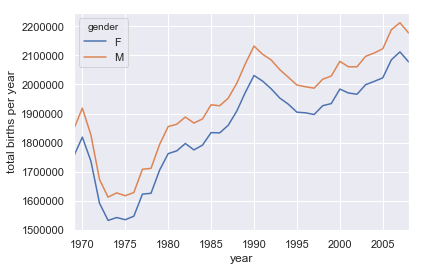

In [17]:
births.pivot_table('births', index='year', columns='gender',aggfunc='sum').plot()
plt.ylabel('total births per year');

In [18]:
births.describe()

,year,month,day,births,decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


1. day data의 크기가 제일 작음
2. day의 max 값이 99 ?

In [19]:
births.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
decade      0
dtype: int64

In [20]:
births = births[births['day'].notnull()]

In [24]:
# 시그마 클리핑 연산
quartiles = np.percentile(births['births'], [25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2]-quartiles[0])
quartiles

array([4344., 4785., 5247.])

In [27]:
births = births.query('(births > @mu - 5*@sig) & (births < @mu + 5*@sig)')
births.describe()

,year,month,day,births,decade
count,14610.000000,14610.000000,14610.000000,14610.000000,14610.000000
mean,1978.501027,6.522930,15.729637,4824.470089,1974.001369
std,5.766538,3.448821,8.800393,579.996983,5.830799
min,1969.000000,1.000000,1.000000,3249.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4383.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4812.000000,1970.000000
75%,1984.000000,10.000000,23.000000,5259.000000,1980.000000
max,1988.000000,12.000000,31.000000,6527.000000,1980.000000


In [29]:
births.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
decade      int64
dtype: object

In [31]:
births['day'] = births['day'].astype(int)

In [32]:
births.index = pd.to_datetime(10000 * births.year + 
                             100 * births.month +
                             births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [33]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


Text(0, 0.5, 'mean births by day')

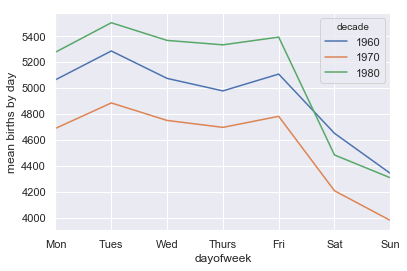

In [35]:
import matplotlib.pyplot as plt

births.pivot_table('births', index='dayofweek',
                  columns='decade',aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

# 벡터화된 문자열 연산 p.208

In [6]:
import pandas as pd
import numpy as np
x = np.array([2,3,4,5])
x*2

array([ 4,  6,  8, 10])

In [7]:
data = ['peter','paul','mary']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary']

In [8]:
momte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 
                  'Eric idle', 'Terry Jones', 'Michael Palin'])

In [13]:
print(momte.str.lower()); print();
print(momte.str.len())

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64


In [14]:
momte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

## Pandas 문자열 연산 메서드 목록 pp.210-215

## 예제: 조리법 데이터베이스 p.215

# 시계열 다루기 p.220

## 기본 파이썬 날자와 시간: datetime과 dateutil

In [2]:
from datetime import datetime
datetime(year=2021, month=4, day=19)

datetime.datetime(2021, 4, 19, 0, 0)

In [9]:
from dateutil import parser
date = parser.parse("19th of April, 2021") # 다양한 문자열 형태로부터 날짜 해석
date

datetime.datetime(2021, 4, 19, 0, 0)

In [11]:
date.strftime('%A')

'Monday'

## 타입이 지정된 시간 배열: NumPy의 datetime64

In [3]:
import numpy as np

date = np.array('2021-04-20', dtype=np.datetime64)
date

array('2021-04-20', dtype='datetime64[D]')

In [4]:
date + np.array(10)

numpy.datetime64('2021-04-30')

# Pandas 시계열: 시간으로 인덱싱하기 p. 225

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Pandas 시계열 도구는 타임스탬프로 데이터를 인덱싱할 경우 유용
index = pd.DatetimeIndex(['2021-04-17','2021-04-18','2021-04-19','2021-04-20'])
data = pd.Series([0,1,2,3], index=index)
data

2021-04-17    0
2021-04-18    1
2021-04-19    2
2021-04-20    3
dtype: int64

In [3]:
data['2021-04-18':'2021-04-19']

2021-04-18    1
2021-04-19    2
dtype: int64

In [9]:
data['2021']

2021-04-17    0
2021-04-18    1
2021-04-19    2
2021-04-20    3
dtype: int64

## Pandas 시계열 데이터 구조

In [13]:
dates = pd.to_datetime(['2015-7-3', '4th of July, 2015', '2015-Jul-6',
                       '07-07-2015','20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [14]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [15]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### 정규 시퀀스 pd.date_range()

In [22]:
# pd;date_range('시작일', '종료일, 선택적 간격)
pd.date_range('2015-07-01', '2015-07-30')

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
               '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
               '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
               '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
               '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
               '2015-07-29', '2015-07-30'],
              dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range('2015-07-01', periods=5)

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05'],
              dtype='datetime64[ns]', freq='D')

In [23]:
pd.date_range('2015-07-01', periods=5, freq='H')

DatetimeIndex(['2015-07-01 00:00:00', '2015-07-01 01:00:00',
               '2015-07-01 02:00:00', '2015-07-01 03:00:00',
               '2015-07-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [27]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## 주기와 오프셋

Pandas 주기코드 (p.228)

D: 달력상 일
W: 주
M: 월말
Q: 분기말
A: 연말
H: 시간
T: 분
S: 초
L: 밀리초
U: 마이크로초
N: 나노초

B: 영업일
BM: 영업일 기준 월말
BQ: 영업일 기준 분기말
BA: 영업일 기준 연말
BH: 영업 시간

모두 지정한 기간의 종료 시점을 표시, 뒤에 접미사 S를 붙이면 종료가 아니라 시작시점으로 표시(ex. MS: 월초)

In [28]:
pd.timedelta_range(0, periods=10, freq = "2H30T") # 2시간 30분 간격으로 10개

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00', '22:30:00'],
               dtype='timedelta64[ns]', freq='150T')

## 리샘플링, 시프팅, 윈도잉

In [46]:
import pandas_datareader as web

goog = web.DataReader('GOOG',start='2012', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,332.827484,324.966949,325.250885,331.462585,7380561.0,331.462585
2012-01-04,333.873566,329.076538,331.273315,332.892242,5749470.0,332.892242
2012-01-05,330.745270,326.889740,329.828735,328.274536,6590410.0,328.274536
2012-01-06,328.767700,323.681763,328.344299,323.796326,5405987.0,323.796326
2012-01-09,322.291962,309.455078,322.042908,310.067780,11688849.0,310.067780


In [47]:
goog = goog['Close']

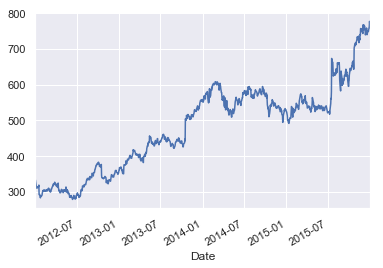

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

goog.plot()

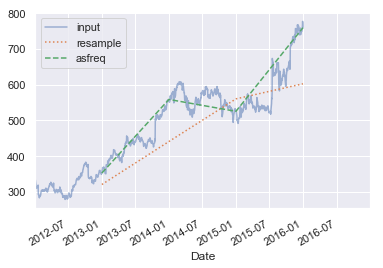

In [49]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input','resample','asfreq'], loc='upper left')

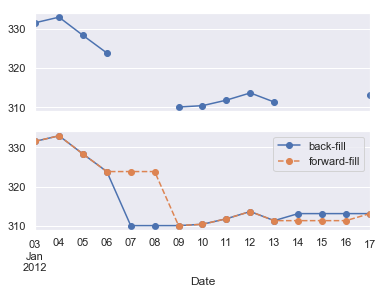

In [51]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')  # 역방향
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o') # 정방향
ax[1].legend(["back-fill", "forward-fill"]);

## 롤링 윈도우(rolling windows) p.235

주가 데이터의 1년 중심 롤링 평균과 표준 편차 

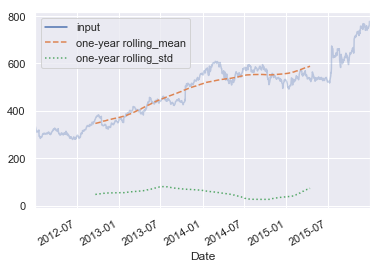

In [52]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-','--',':'])
ax.lines[0].set_alpha(0.3)

## 예제: 시애틀 자전거 수 시각화

In [55]:
import pandas as pd; import numpy as np

Path = '../python-ds-handbook-master/notebooks/data/Fremont_Bridge_Bicycle_Counter.csv'
data = pd.read_csv(Path, index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [56]:
data.tail()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2021-03-31 19:00:00,194.0,84.0,110.0
2021-03-31 20:00:00,74.0,37.0,37.0
2021-03-31 21:00:00,42.0,25.0,17.0
2021-03-31 22:00:00,30.0,10.0,20.0
2021-03-31 23:00:00,10.0,3.0,7.0


In [59]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,140680.000000,140680.000000,140680.000000
mean,111.245472,50.666001,60.579471
std,142.190544,65.559949,88.412836
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


### 데이터 시각화하기

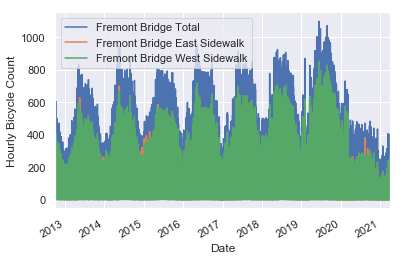

In [60]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

data.plot()
plt.ylabel('Hourly Bicycle Count');

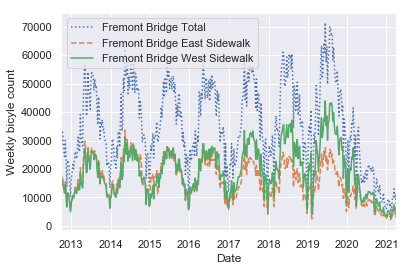

In [67]:
weekly = data.resample('W').sum() # 주 단위 리샘플링
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicyle count');

Text(0, 0.5, 'mean hourly count')

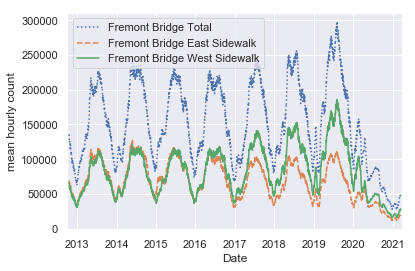

In [71]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count')

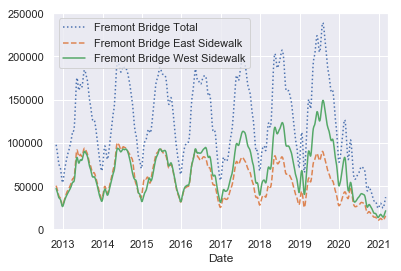

In [72]:
daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

### 데이터 파헤쳐 보기

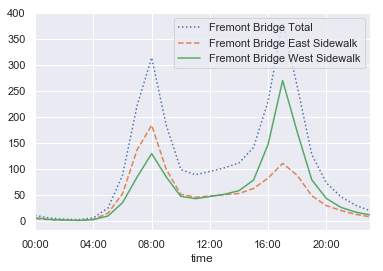

In [83]:
by_time = data.groupby(data.index.time).mean() # 시간대별 평균 통행랼
hourly_ticks = 4 *  60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':','--','-']);

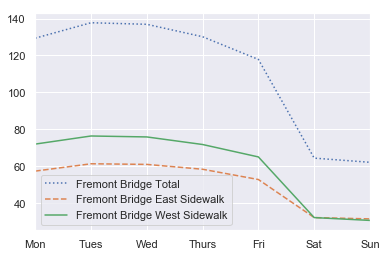

In [84]:
by_weekday = data.groupby(data.index.dayofweek).mean() # 요일대별 평균 통행랼
by_weekday.index = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-']);

In [89]:
weekend= np.where(data.index.weekday < 5, 'Weekday','Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


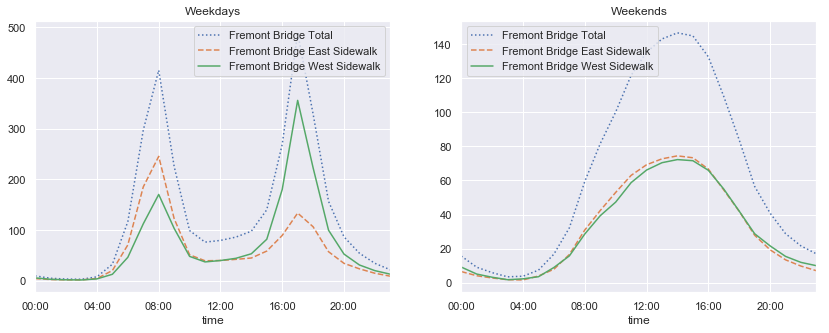

In [91]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14,5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks =hourly_ticks, style=[':','--','-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks =hourly_ticks, style=[':','--','-'])

# 고성능 Pandas: eval()과 query()

## query()와 eval()의 등장 배경: 복합 표현식

In [2]:
import pandas as pd
import numpy as np

nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                     for i in range(4))

In [3]:
%timeit df1 + df2 + df3 + df4

102 ms ± 2.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
%timeit pd.eval('df1+df2+df3+df4')

53.1 ms ± 6.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
# 두 값이 동일한지 확인, 동일하면 True, 틀리면 False
np.allclose(df1+df2+df3+df4, pd.eval('df1+df2+df3+df4'))

True

## 열 단위의 연산을 위한 DataFrame.eval()

In [9]:
import pandas as pd
import numpy as np
rng = np.random.RandomState(42)

df = pd.DataFrame(rng.rand(1000,3), columns=['A','B','C'])
df.head()

,A,B,C
0,0.374540,0.950714,0.731994
1,0.598658,0.156019,0.155995
2,0.058084,0.866176,0.601115
3,0.708073,0.020584,0.969910
4,0.832443,0.212339,0.181825


pd.eval() 메서드

In [13]:
result1 = (df['A'] + df['B']) / df['C']
result2 = pd.eval("(df.A + df.B) / df.C")
np.allclose(result1, result2)

True

DataFrame.eval() 메서드

In [16]:
result3 = df.eval('(A + B) / C')
np.allclose(result2, result3)

True

## DataFrame.eval( )에서의 할당

In [17]:
df.head()

,A,B,C
0,0.374540,0.950714,0.731994
1,0.598658,0.156019,0.155995
2,0.058084,0.866176,0.601115
3,0.708073,0.020584,0.969910
4,0.832443,0.212339,0.181825


In [20]:
df.eval('D = (A - B) / C', inplace=True)

In [21]:
df.head()

,A,B,C,D
0,0.374540,0.950714,0.731994,-0.787130
1,0.598658,0.156019,0.155995,2.837535
2,0.058084,0.866176,0.601115,-1.344323
3,0.708073,0.020584,0.969910,0.708816
4,0.832443,0.212339,0.181825,3.410442


DataFrame.eval( )의 지역 변수

In [25]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

## DataFrame.query( ) 메서드

In [1]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

NameError: name 'df' is not defined

In [31]:
Mean = 0.5
result3 = df.query('A < @Mean and B < @Mean')
np.allclose(result2, result3)

True